### Analisa dan Prediksi Dataset Zomato <br>
https://www.kaggle.com/datasets/narsingraogoud/zomato-restaurants-dataset-for-metropolitan-areas/data <br>

Zomato adalah perusahaan multinasional dari India yang bergerak di bidang restaurant aggregator dan food delivery <br>

Disini saya akan memproses data, mengerjakan EDA dan Deep Dive Question untuk memberikan insight dari dataset. <br>

Targetnya adalah memberikan insight kepada: <br>
1. Pemilik bisnis, yang ingin membuka bisnis restaurant atau mengembangkan bisnis restaurantnya untuk mengetahui area yang ramai disetiap kota pada dataset ini dan jenis makanan apa yang populer<br>
2. Partner delivery service, untuk menentukan mana area paling ramai<br>
3. Pendatang atau turis, yang ingin mencari tempat kuliner yang tepat untuk mereka<br>


#### Legends:

1. Restaurant Name: The name of the restaurant.<br>
2. Dining Rating: The rating given by customers for the dining experience at the restaurant.<br>
3. Delivery Rating: The rating given by customers for the delivery service provided by the restaurant.<br>
4. Dining Votes: The number of votes or reviews received for the dining experience.<br>
5. Delivery Votes: The number of votes or reviews received for the delivery service.<br>
6. Cuisine: The type of cuisine or culinary style offered by the restaurant.<br>
7. Place Name: Area where the given restaurant name is located.<br> 
8. City Name: The name of the metropolitan area or city where the restaurant is located. The dataset includes the following cities: Hyderabad, Kolkata, Lucknow, Pune, Chennai, Bengaluru, Mumbai, Raipur, Jaipur, Ahmedabad, Kochi, Goa, and New Delhi.<br>
9. Item Name: The name of a specific dish or item offered by the restaurant.<br>
10. Best Seller: Indicates whether the item is a best-selling dish or not.<br>
11. Votes: The number of votes or reviews received for the specific item.<br>
12. Prices: The prices associated with each item offered by the restaurant.<br>


In [ ]:
#for G-colab
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#for G-colab
#path = ("/content/drive/MyDrive/dibimbing.id/Final Project/zomato_dataset.csv")

In [ ]:
#for G-colab
#zomato = pd.read_csv(path)

In [2]:
#for J-notebook
zomato = pd.read_csv('zomato_dataset.csv')

In [3]:
zomato.sample(10)

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
104350,Neelkanth Sweets,4.2,4.3,779,0,Beverages,Gomti Nagar,Lucknow,Mixed Uttapam,NaN,5,213.00
96645,Sandwich Guru,NaN,4.1,0,11,Beverages,Wilson Garden,Bangalore,Chocolate Milk Shake,BESTSELLER,0,80.00
100062,Chung Fa Restaurant,4.1,4.0,586,355,Fast Food,Mahanagar,Lucknow,Fish in Hot Garlic Sauce [12 Pieces],NaN,0,570.00
24425,SLAY Coffee,NaN,3.9,0,0,Shake,Worli,Mumbai,Grilled Chicken Nuggets with Mayo Dip,BESTSELLER,11,190.00
104337,Neelkanth Sweets,4.2,4.3,779,0,Beverages,Gomti Nagar,Lucknow,Butter Masala Dosa,NaN,5,202.00
97185,Thalairaj Biryani,NaN,4.1,0,0,South Indian,Indiranagar,Bangalore,Pepper Chicken Boneless Biryani Family Pack,NaN,0,875.00
67672,Kwality Walls Frozen Dessert and Ice Cream Shop,NaN,4.2,0,553,Desserts,Wilson Garden,Bangalore,Cornetto Black Forest [110 ml],Not eligible for coupons,0,65.00
120268,Goli Rolls And Vada Pav,NaN,4.3,0,162,Pizza,Samta Colony,Raipur,Choco Lava,MUST TRY,7,100.00
66116,McDonald's,3.5,3.8,214,0,Beverages,MG Road,Bangalore,Flat White,NaN,0,175.24
92560,Aromas Of Biryani,4.2,4.0,423,0,North Indian,Jayanagar,Bangalore,Egg Fried Rice,NaN,14,239.00


In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


### Data Cleaning and Preprocessing

In [5]:
zomato.duplicated().sum()

22127

In [6]:
#look for duplicated rows
if (duplicated := zomato.duplicated(keep=False)).any():
    some_duplicates = zomato[duplicated].sort_values(by=zomato.columns.to_list()).head()
    print(f"Dataframe has one or more duplicated rows, for example:\n{some_duplicates}")

Dataframe has one or more duplicated rows, for example:
      Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
60171    12 To 12 BBQ            4.0              4.0           104   
60183    12 To 12 BBQ            4.0              4.0           104   
60172    12 To 12 BBQ            4.0              4.0           104   
60178    12 To 12 BBQ            4.0              4.0           104   
60141    12 To 12 BBQ            4.0              4.0           104   

       Delivery Votes Cuisine         Place Name    City  \
60171               0  Biryani  Panampilly Nagar   Kochi   
60183               0  Biryani  Panampilly Nagar   Kochi   
60172               0  Biryani  Panampilly Nagar   Kochi   
60178               0  Biryani  Panampilly Nagar   Kochi   
60141               0  Biryani  Panampilly Nagar   Kochi   

                                     Item Name Best Seller  Votes  Prices  
60171  12 to 12 Fried Chicken with Garlic Rice         NaN      0   410.0  
6018

In [7]:
zomato = zomato.drop_duplicates()

In [8]:
zomato.duplicated().sum()

0

In [9]:
zomato.isnull().sum()

Restaurant Name        0
Dining Rating      26958
Delivery Rating     1244
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        82387
Votes                  0
Prices                 0
dtype: int64

In [10]:
zomato['Dining Rating'].fillna(0, inplace=True)

In [11]:
zomato['Delivery Rating'].fillna(0, inplace=True)

In [12]:
zomato['Best Seller'].unique()

array(['BESTSELLER', nan, 'MUST TRY', "CHEF'S SPECIAL", 'SEASONAL',
       'Not eligible for coupons', 'VEGAN', 'Not on Pro', 'SPICY', 'NEW',
       'GLUTEN FREE', 'DAIRY FREE', 'FODMAP FRIENDLY',
       'Eggless available'], dtype=object)

By legend, `Best Seller` column indicates wether the items is a best-selling dish or not, so actually the value is simply 'Yes' or 'No'

In [13]:
zomato['Best Seller'].fillna('No', inplace=True)

In [14]:
zomato['Best Seller'] = zomato['Best Seller'].apply(lambda x: 'Yes' if x != 'No' else x)

In [15]:
zomato.isnull().sum()

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best Seller        0
Votes              0
Prices             0
dtype: int64

In [16]:
zomato.sample(10)

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
98774,HSR High Street,3.9,4.0,0,0,Desserts,HSR,Bangalore,Gulab Jamun With Ice Cream,Yes,13,115.0
111126,Hatari,3.8,4.2,43,166,Pizza,Bow Bazar,Kolkata,Vegetable Spicy Dragon Noodle Hakka,No,0,308.0
109726,If Pizza,4.2,4.2,122,0,Fast Food,Pandav Nagar,New Delhi,Corn Capsicum Pizza,No,0,150.0
106089,Maharaja Restaurant,3.2,3.5,67,0,Chinese,Charbagh,Lucknow,Egg Fried Rice,No,0,150.0
122330,Chef's Kitchen,4.0,3.9,413,0,Pizza,Civil Lines,Raipur,Green Salad,No,0,120.0
112187,Sher-E-Punjab,3.3,3.7,310,0,Pizza,Theatre Road,Kolkata,Mixed Hot and Sour Soup,No,0,210.0
37409,Gusto Pizza,0.0,3.8,0,77,Fast Food,Mylapore,Chennai,Oh So Spicy Bacon & Sausage Arabiata Pasta,No,0,319.0
113665,Rollick,4.0,4.3,444,0,Pizza,Park Street Area,Kolkata,Nuts,No,8,10.0
119032,Jalaram Sweets And Namkeen,0.0,4.1,0,346,Pizza,Tikrapara,Raipur,Dahi Samosa [2 Pieces] with Special Khaman Dho...,Yes,7,135.0
59716,Cafe Durbar AFC,3.8,3.7,36,0,Beverages,Pallimukku,Kochi,Chilli Cheese Toast Grilled Sandwich,No,10,89.0


In [17]:
zomato['Best Seller'] = zomato['Best Seller'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
zomato.duplicated().sum()

2223

After we processed `Best Seller` values, there are some duplicated data come up

In [19]:
zomato = zomato.drop_duplicates()

In [20]:
zomato.duplicated().sum()

0

In [21]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99307 entries, 0 to 123634
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant Name  99307 non-null  object 
 1   Dining Rating    99307 non-null  float64
 2   Delivery Rating  99307 non-null  float64
 3   Dining Votes     99307 non-null  int64  
 4   Delivery Votes   99307 non-null  int64  
 5   Cuisine          99307 non-null  object 
 6   Place Name       99307 non-null  object 
 7   City             99307 non-null  object 
 8   Item Name        99307 non-null  object 
 9   Best Seller      99307 non-null  int64  
 10  Votes            99307 non-null  int64  
 11  Prices           99307 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.8+ MB


#### Dataset is clean now, no duplicated rows and no null (NaN) values

### EDA

In [22]:
zomato.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Best Seller,Votes,Prices
count,99307.000000,99307.000000,99307.000000,99307.000000,99307.000000,99307.00000,99307.000000
mean,2.812712,3.910393,152.137966,116.223579,0.170381,17.02599,243.644034
std,1.720038,0.500917,230.842566,243.267108,0.375969,101.29082,198.207330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.950000
25%,0.000000,3.800000,0.000000,0.000000,0.000000,0.00000,130.000000
50%,3.700000,4.000000,30.000000,0.000000,0.000000,0.00000,209.000000
75%,4.000000,4.100000,221.000000,36.000000,0.000000,9.00000,299.000000
max,4.800000,4.600000,997.000000,983.000000,1.000000,9750.00000,12024.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\2066383000.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\2066383000.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\2066383000.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\2066383000.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\2066383000.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


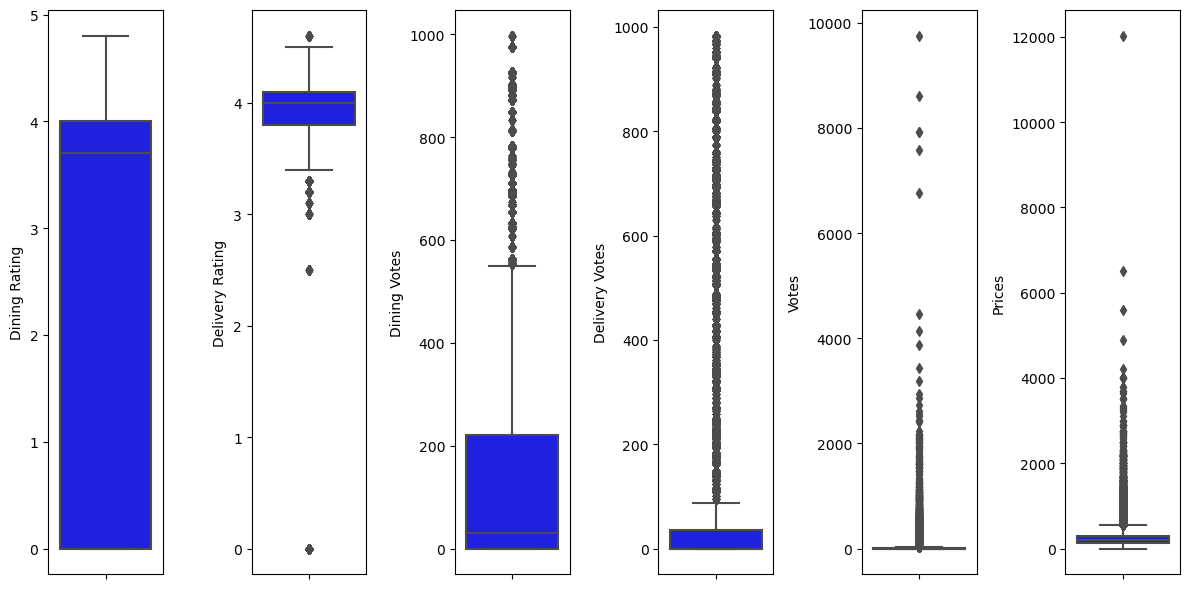

In [23]:
# Detecting outliers
plt.figure(figsize=(12,6))

# plotting
features = ['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Votes', 'Prices']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=zomato[features[i]], color='blue')
    plt.tight_layout()
    
    #plt.savefig("boxplot1.jpg", dpi=300, bbox_inches='tight')
    #plt.show()

#### From all box-plots above, we can see that data variance are very high
1. Rating plots: <br>
    `Dining Rating` shows imbalance data with positive skew distribution <br>
    `Delivery Rating` data is pretty balance with some acceptable outliers because rating is pretty subjective matter <br>
2. Votes plots: <br>
    All three plots are imbalance data with positive skew shows that a lot of the customers are reluctant to vote <br>
3. Prices: <br>
    Actually the plot is pretty balance but with so many outliers, but data shows that there are foods with that much price, so we keep the outliers <br>

In [23]:
zomato['Best Seller'].value_counts()

Best Seller
0    82387
1    16920
Name: count, dtype: int64

In [24]:
total_votes = zomato['Votes'].value_counts()
total_0 = total_votes.get(0, 0)
total_not_0 = total_votes.sum() - total_0

print(f'Total voted =  {total_not_0}, Total unvoted =  {total_0}')

Total voted =  36544, Total unvoted =  62763


In [25]:
zomato_num = zomato[['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Best Seller', 'Votes', 'Prices']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\3499086752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_num['Best Voted'] = zomato_num['Votes'].apply(lambda x: 'Not Voted' if x == 0 else 'Voted')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\3499086752.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


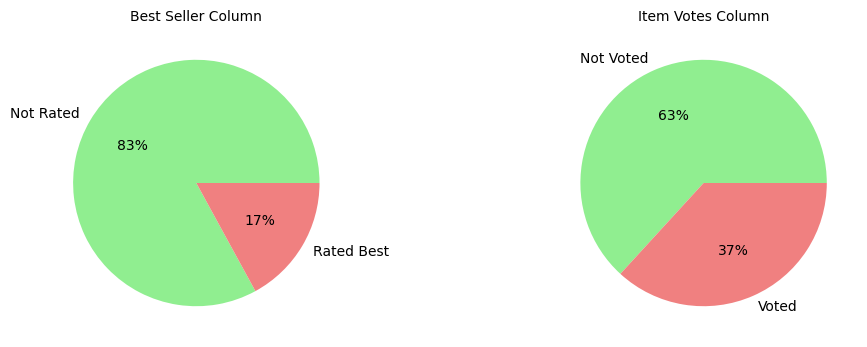

In [27]:
# Best Seller comparison

best_sellers = zomato_num['Best Seller'].value_counts()

zomato_num['Best Voted'] = zomato_num['Votes'].apply(lambda x: 'Not Voted' if x == 0 else 'Voted')
best_vot = zomato_num['Best Voted'].value_counts(normalize=True)*100

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colors = ['lightgreen','lightcoral']

ax1 = plt.subplot(1,2,1)
ax1.pie(best_sellers, labels=['Not Rated','Rated Best'], colors=colors, autopct='%.0f%%')
plt.title('Best Seller Column',fontsize=10)

ax2 = plt.subplot(1,2,2)
ax2.pie(best_vot, labels=['Not Voted','Voted'], colors=colors, autopct='%.0f%%')
plt.title('Item Votes Column',fontsize=10)

#plt.savefig("Bestseller.jpg", dpi=300, bbox_inches='tight')
plt.show()

#### Both plots shows imbalance data
We can see that only 38% of the customers gave their vote for the food they bought and 17% of the meals are rated as `Best Seller`   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\372084372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_num['Dine Rated'] = zomato_num['Dining Rating'].apply(lambda x: 'Not Rated' if x == 0 else 'Rated')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\372084372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_num['Delv Rated'] = zomato_num['Delivery Rating'].apply(lambda x: 'Not Rated' if x == 0 else 'Rated')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4924\372084372.py:8: Settin

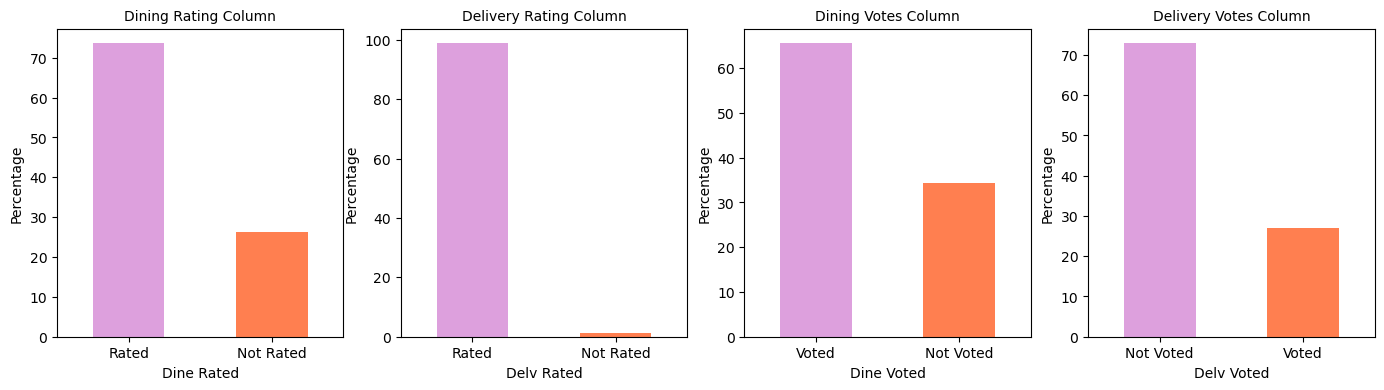

In [28]:
### Dining Rated Comparison
zomato_num['Dine Rated'] = zomato_num['Dining Rating'].apply(lambda x: 'Not Rated' if x == 0 else 'Rated')
dine_rtg_counts = zomato_num['Dine Rated'].value_counts(normalize=True)*100
# Delivery Rated Comparison
zomato_num['Delv Rated'] = zomato_num['Delivery Rating'].apply(lambda x: 'Not Rated' if x == 0 else 'Rated')
delv_rtg_counts = zomato_num['Delv Rated'].value_counts(normalize=True)*100
# Dining Voted Comparison
zomato_num['Dine Voted'] = zomato_num['Dining Votes'].apply(lambda x: 'Not Voted' if x == 0 else 'Voted')
dine_vot_counts = zomato_num['Dine Voted'].value_counts(normalize=True)*100
# Delivery Voted Comparison
zomato_num['Delv Voted'] = zomato_num['Delivery Votes'].apply(lambda x: 'Not Voted' if x == 0 else 'Voted')
delv_vot_counts = zomato_num['Delv Voted'].value_counts(normalize=True)*100

# Plots
plt.figure(figsize=(17, 4))
colors = ['plum','coral']

plt.subplot(1,4,1)
dine_rtg_counts.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title('Dining Rating Column',fontsize=10)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.subplot(1,4,2)
delv_rtg_counts.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title('Delivery Rating Column',fontsize=10)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.subplot(1,4,3)
dine_vot_counts.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title('Dining Votes Column',fontsize=10)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.subplot(1,4,4)
delv_vot_counts.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title('Delivery Votes Column',fontsize=10)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

#plt.savefig("ratingsvotes.jpg", dpi=300, bbox_inches='tight')
plt.show()

1. Dining-in: <br>
    Almost 70% of the customers gave their vote and more than 70% of the customers gave their rating <br>

2. Delivery: <br>
    More than 70% of the customers gave their vote and almost 100% of the customers gave their rating <br>

In [26]:
#Jumlah total restaurant yang terdaftar
zomato['Restaurant Name'].nunique()

826

Text(0.5, 1.0, 'Number Of Restaurants In Every City')

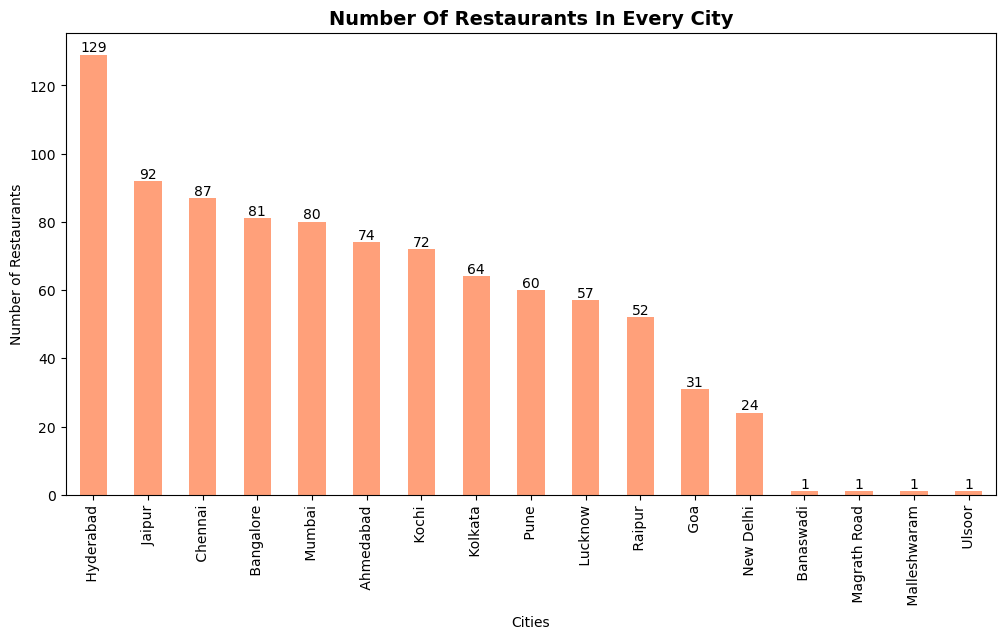

In [27]:
# Restaurants of Cities

plt.figure(figsize = (12,6))

restos = zomato.groupby('City')['Restaurant Name'].nunique()
restaurant = restos.sort_values(ascending=False)            

ax = restaurant.plot(kind = 'bar', color = 'lightsalmon')

for i, v in enumerate(restaurant):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.title("Number Of Restaurants In Every City",fontsize = 14, weight = 'bold')

#plt.savefig("restos.jpg", dpi=300, bbox_inches='tight')

From the graph above we can see the distribution of restaurants in every cities which are using Zomato service with Hyderabad is the most with 129 restaurants.

In [27]:
zomato['Cuisine '].unique()

array(['Fast Food', 'Wraps', 'Biryani', 'Chinese', 'Beverages',
       'Desserts', 'Shake', 'Mandi', 'South Indian', 'Kebab', 'Pizza',
       'Bakery', 'Ice Cream', 'Mughlai', 'North Indian', 'Momos',
       'Shawarma', 'Burger', 'Turkish', 'Rolls', 'Coffee', 'Seafood',
       'Hyderabadi', 'Salad', 'Sichuan', 'Sandwich', 'Italian',
       'Lucknowi', 'Continental', 'American', 'Mexican', 'Kerala', 'BBQ',
       'Rajasthani', 'Healthy Food', 'Tibetan', 'Street Food', 'Mithai',
       'Juices', 'Maharashtrian', 'Thai', 'Vietnamese', 'Pasta',
       'Gujarati', 'Kathiyawadi', 'Andhra', 'Awadhi', 'Tea'], dtype=object)

In [28]:
zomato['Cuisine '].nunique()

48

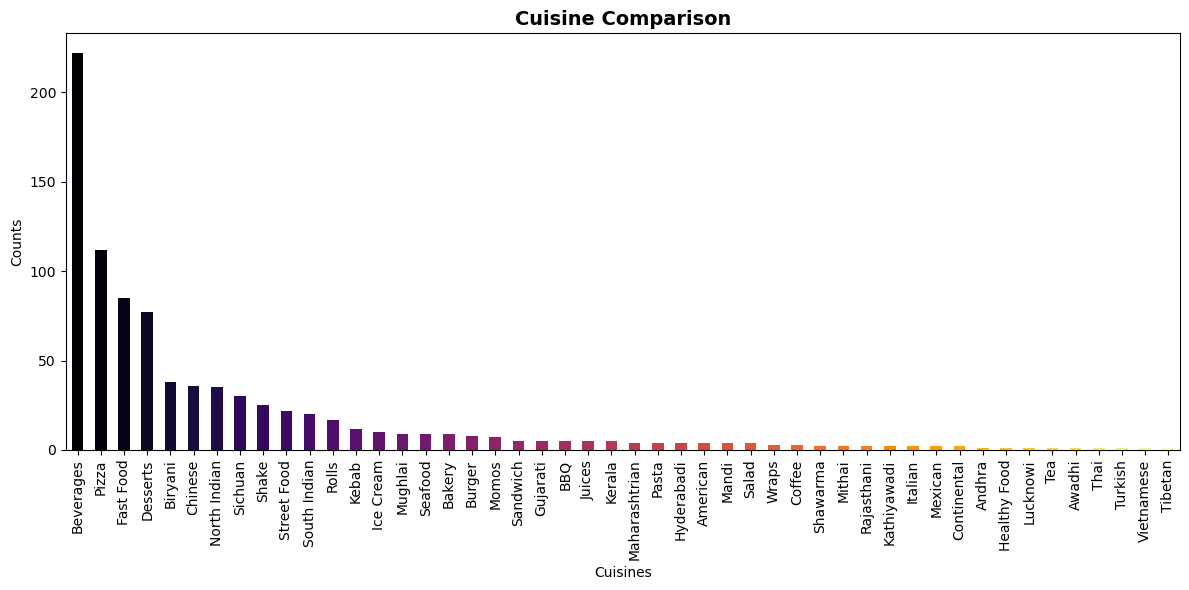

In [33]:
grouped_cuisine = (zomato.groupby(["Restaurant Name", "Cuisine "])
                .agg({"Restaurant Name": "first", "Cuisine ": "first"}))
#grouped_cuisine

plt.figure(figsize = (12,6))

cuisines = grouped_cuisine['Cuisine '].value_counts()
cuisines1 = cuisines.sort_values(ascending=False)            

cmap = plt.get_cmap('inferno')
col=cmap(np.linspace(0, 1, len(cuisines1)))

ax = cuisines1.plot(kind='bar', color=col)
   
plt.xlabel("Cuisines")
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.title("Cuisine Comparison",fontsize = 14, weight = 'bold')

plt.tight_layout()
#plt.savefig("cuisine_comp1.jpg", dpi=300)
plt.show()

Checking and fixing restaurant that categorized as beverage as their cuisine

In [34]:
def cuisine_bev(city):
    city2 = zomato.loc[(zomato.City == ' ' + city)]
    
    filtered = city2[city2['Cuisine '] == 'Beverages']
    grouped = filtered.groupby('Restaurant Name').size()

    return grouped

city = input('Enter city name: ')
cuisine_bev(city)

Enter city name: Hyderabad


Restaurant Name
Al Akbar Fast Food Corner            12
Balaji Santosh Family Dhaba         169
Barbeque Nation                      45
Barrack's Grill                      49
Cafe Niloufer                       195
California Burrito                   82
Capital Multi Cuisine Restaurant    258
Down Town Restaurant & Cafeteria     11
Exotica                             164
Food Track                           74
Grand Hotel                         172
Hotel Nayaab                         50
Hotel Shadab                         61
Hotel Shubham Prestige              204
Hotel Swagath Grand                 194
Kritunga                             10
Lucky Restaurant                    109
MS Mandi & Shawarma                 128
New Santosh Dhaba                   154
Onesta                              146
Pista House                          82
Pista House - Premium Lounge        171
Pista House Bakery                  121
Pizza Hut                           128
Platform 65             

In [29]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Burger King', 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'KFC', 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Krispy Kreme', 'Bakery', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Magnolia Bakery', 'Bakery', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "McDonald's", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Pizza Hut', 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Sandwich Guru', 'Sandwich', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Chaat Street', 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Cafe Niloufer', 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Capital Multi Cuisine Restaurant", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Down Town Restaurant & Cafeteria", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Exotica", 'Seafood', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Food Track", 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Grand Hotel", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hotel Nayaab", 'Hyderabadi', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hotel Shadab", 'Mughlai', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hotel Shubham Prestige", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Kritunga", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hotel Swagath Grand", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Lucky Restaurant", 'Hyderabadi', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Onesta", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Platform 65", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sarvi Restaurant", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sip & Bite", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Surabhi Grand", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Taj Mahal - Taj Mahal Hotel", 'North Indian', zomato['Cuisine '])

In [30]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == 'Barbeque Nation', 'BBQ', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Barrack's Grill", 'BBQ', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "California Burrito", 'American', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pista House", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pista House - Premium Lounge", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pista House Bakery", 'Bakery', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Subway", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Wendy's Burgers", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Yashwanth Pizza Den", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shah Ghouse Special Shawarma", 'Shawarma', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "MS Mandi & Shawarma", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Thickshake Factory", 'Shake', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shree Santosh Family Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "New Santosh Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Balaji Santosh Family Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "WOW! Momo", 'Momos', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Al Akbar Fast Food Corner", 'Fast Food', zomato['Cuisine '])

In [31]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Alpine Restaurant & Banquet", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Bole To Vadapav", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Ghar Ka Khana by EatFit", 'Healthy Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "HL Frankie", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Jassi De Parathe", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Jay Bhavani Vadapav", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "New Freeze Land", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Puffizza", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Grand Thakar", 'Gujarati', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Urban Khichdi", 'South Indian', zomato['Cuisine '])

In [32]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Amritsar Punjab Paratha", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Anjoy Latenight Meals", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Burger Farm", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Fayrouz", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "London Yard Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Marky Momos", 'Momos', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "P. Bhagat Tarachand", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Radhe Restaurants", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shakti - The Sandwich Shop", 'Sandwich', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shree Marutinandan Kathiyawadi Restaurant", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Lio Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Vadilal - Scoop Shop", 'Desserts', zomato['Cuisine '])

In [33]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Arham", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Basant Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Bell Pepper Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Brown Sugar", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Burger Shack", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Burgs & Fries", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chops 'N' Woks", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Dip N Bite", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Flavorsome Feasts", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Friedisthan", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Harishankar Veg Restro", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hil Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "JMD Bakery & Fast Food", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Jal Mahal Ice Cream Parlour", 'Ice Cream', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Laziz Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pizza And Burger King", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pizza Unlimited", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "RR62 - Cafe & Kitchen", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "RollsKing", 'Rolls', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Roop Basant Pavitra Bhojnalaya", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shofu - The Momo Man", 'Momos', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "St. Louis Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Swat Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Tapri Pratham", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Thali and More", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Messy Door", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Momoz Hub", 'Momos', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Yellow House - The Robot Restaurant", 'North Indian', zomato['Cuisine '])

In [34]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Al Baik", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Al Faham", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Anjappar", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Babal Da Punjabi Dabha", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "BurgerMan", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chidambaram New Moorthy Cafe", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Delhi Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "EatFit", 'Healthy Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Great Indian Khichdi by EatFit", 'Healthy Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Grill A Delics", 'BBQ', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hotel Paramount", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hotel Sennthur", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Junior Kuppanna", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "KMS Hakkim Kalyana Biriyani", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Kim Ling Chinese Restaurant", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Liza Restaurant", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Meat And Eat", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Ponnusamy Hotel", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Samco", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "T Shop - Tea, Snacks & More", 'Tea', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Thanjai Veeraswamy", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The High Joint", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Toscano", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Tower Burger", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Writer's Cafe", 'Continental', zomato['Cuisine '])

In [35]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "A2B - Adyar Ananda Bhavan", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Daily Sushi", 'Seafood', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "EasyBites by Empire", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Gopaljee Cafe", 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Kataria's", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Lassi N Cafe", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Marwadi Chaat & Tiffin Services", 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Roti Ghar", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Savi Sagar", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sri Udupi Food Hub", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Theobroma", 'Bakery', zomato['Cuisine '])

In [36]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "99 Pancakes", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Annamaya", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Apoorva Delicacies", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Aromas Cafe & Bistro", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Art Of Dum", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "BOX8 - Desi Meals", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chaitanya", 'Seafood', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chitale Xpress", 'Mithai', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Delhi Zaika", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Food Adda", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Fuel Up", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Gokul Refreshment", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Italian Bay", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Jimis Burger", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Juno's Pizza - Baking Fresh Since 1974", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "LeanCrust Pizza - ThinCrust Experts", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Mealful Rolls - India's Biggest Rolls", 'Rolls', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "New Pankaj - Sandwich & Pani Puri", 'Sandwich', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Ovenfresh", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "PizzaExpress", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Potoba", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shobhaa Only Veg", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Starboy Pizza & Shakes", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Belgian Waffle Co.", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Tossin Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Winners Pizza - Fresh Dough", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Wowfillss", 'Desserts', zomato['Cuisine '])

In [37]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Al Taza", 'Shawarma', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Baskin Robbins - Ice Cream Desserts", 'Ice Cream', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Burger Spot", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Burgeria", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Cafe 17", 'American', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Cafe Durbar AFC", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Cups & Cones", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Dindigul Thalappakatti", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Donut Factory", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Firebirds", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hoy Punjab", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Jugos", 'Pasta', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pizzaman", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Quick Snacks", 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Rumaan Restaurant", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shawarma Daddy", 'Shawarma', zomato['Cuisine '])

In [38]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chowman", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Aroma's Hyderabad House", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Best Belgian Waffle", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Blue Nile", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Big Daddy's", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chaayos Chai+Snacks=Relax", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Cream Craver", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Garden Vada Pav Centre", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "George Restaurant", 'Mughlai', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Jai Bhavani Snacks Center", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "King Of Burger", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "MOJO Pizza - 2X Toppings", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Marrakesh", 'Shawarma', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "NH1 Bowls - Highway To North", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pizza Bites", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Rolls Mania", 'Rolls', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Roopali Veg", 'South Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sandwich Express", 'Sandwich', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Saparito Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sukanta", 'Gujarati', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Supreme Sandwich Corner", 'Sandwich', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Pizza Box", 'Pizza', zomato['Cuisine '])

In [39]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Goli Vadapav No.1", 'Street Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "LA'Pizza Club", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Madhurima Veg", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Neelkanth Sweets", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Nukkad Cafe", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Old Al - Baik", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "PVR Café", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Pizza Cave", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The American Pizza", 'Pizza', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Vadilal Ice Creams", 'Ice Cream', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Wat-a-Burger! - India ka Burger", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Ritz Classic", 'Seafood', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shivam Classic", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Big Smokin Burgers", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Chili's Grill & Bar", 'BBQ', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Diggin", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hashtag Foods", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Natural Ice Cream", 'Ice Cream', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Paparizza - Woodfired Pizzas", 'Pizza', zomato['Cuisine '])

In [46]:
def cuisine_piz(city):
    city2 = zomato.loc[(zomato.City == ' ' + city)]
    
    filtered = city2[city2['Cuisine '] == 'Pizza']
    grouped = filtered.groupby('Restaurant Name').size()

    return grouped

city = input('Enter city name: ')
cuisine_piz(city)

Enter city name: Kolkata


Restaurant Name
Balaram Mullick & Radharaman Mullick Sweets    106
Behrouz Biryani                                 94
Burger In Law                                   29
Dreams Cafe                                     99
Eagle Bites Pizza                               55
Edabba                                         153
Fried Chicken Wala                             166
Golden Joy                                      38
Goutam's                                       107
Grab Feast                                      30
HFC                                             15
Hatari                                         336
I Love Haldiram                                178
Kathi Junction                                  46
Khana Khazana                                  270
Kreamz                                          52
Lazeez Biryani                                  34
Mama Mia!                                      107
Mezban                                         121
Mitra Cafe     

In [40]:
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Balaram Mullick & Radharaman Mullick Sweets", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Behrouz Biryani", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Burger In Law", 'Burger', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Edabba", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Fried Chicken Wala", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Golden Joy", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Goutam's", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Grab Feast", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "HFC", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Hatari", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "I Love Haldiram", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Kathi Junction", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Khana Khazana", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Kreamz", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Lazeez Biryani", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Mama Mia!", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Mezban", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Mitra Cafe", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Momo I Am", 'Momos', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "New Paul Dhaba Veggie Hub", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Noodle King", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Oudh 1590", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Peaberrys", 'Coffee', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Raasta Cafe", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Rang De Basanti Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Rollick", 'Desserts', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Rosy Roti", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Roy Dhaba", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Royal Indian Hotel  - Since 1905", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Safe House", 'Italian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Saima Restaurant", 'Mughlai', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shawarma Nation", 'Shawarma', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sher-E-Punjab", 'North Indian', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Shiraz Golden Restaurant", 'Awadhi', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Sip 'N' Bite's", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Super Star Hazi Biryani", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Taj Biryani", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Biryani Inc.", 'Biryani', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Tea Junction", 'Tea', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Bahubelly", 'American', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "The Burping Panda", 'Chinese', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Veggie Corner", 'Continental', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "WFC - Wow Fried Chicken", 'Fast Food', zomato['Cuisine '])
zomato['Cuisine '] = np.where(zomato['Restaurant Name'] == "Zam Zam Restaurant", 'Mughlai', zomato['Cuisine '])

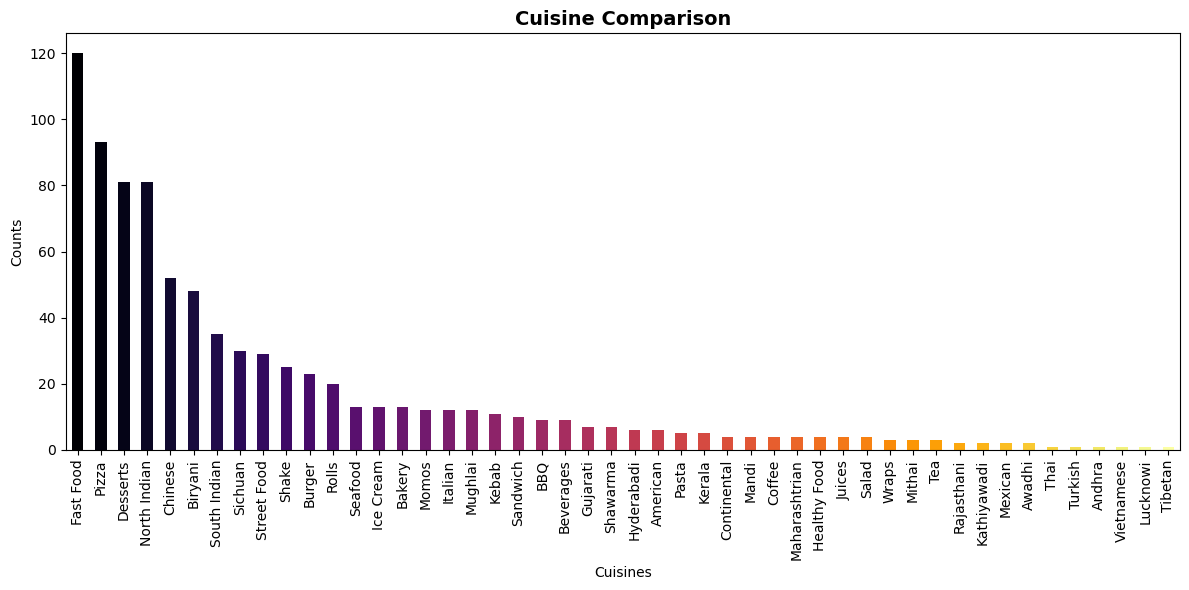

In [46]:
grouped_cuisine = (zomato.groupby(["Restaurant Name", "Cuisine "])
                .agg({"Restaurant Name": "first", "Cuisine ": "first"}))
#grouped_cuisine

plt.figure(figsize = (12,6))

cuisines = grouped_cuisine['Cuisine '].value_counts()
cuisines1 = cuisines.sort_values(ascending=False)            

cmap = plt.get_cmap('inferno')
col=cmap(np.linspace(0, 1, len(cuisines1)))

ax = cuisines1.plot(kind='bar', color=col)
   
plt.xlabel("Cuisines")
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.title("Cuisine Comparison",fontsize = 14, weight = 'bold')

plt.tight_layout()
#plt.savefig("cuisine_comp2.jpg", dpi=300)
plt.show()

Now the cuisine variance look much make sense

In [41]:
zomato_nums = zomato[['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Best Seller', 'Votes', 'Prices']]

In [42]:
zomato_nums.corr(method='spearman')

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Best Seller,Votes,Prices
Dining Rating,1.000000,0.222589,0.561367,-0.301816,-0.015358,0.093269,0.079514
Delivery Rating,0.222589,1.000000,0.061511,-0.094177,0.013489,0.107690,0.054150
Dining Votes,0.561367,0.061511,1.000000,-0.338921,-0.029727,0.041693,0.019203
Delivery Votes,-0.301816,-0.094177,-0.338921,1.000000,0.031527,-0.195250,-0.029131
Best Seller,-0.015358,0.013489,-0.029727,0.031527,1.000000,0.360473,0.010244
Votes,0.093269,0.107690,0.041693,-0.195250,0.360473,1.000000,-0.170655
Prices,0.079514,0.054150,0.019203,-0.029131,0.010244,-0.170655,1.000000


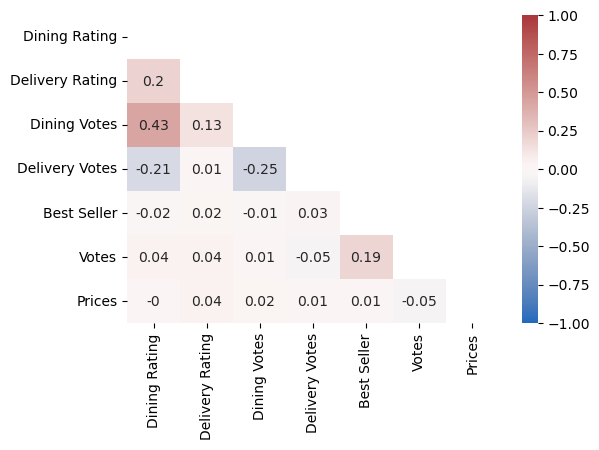

In [49]:
#sns.heatmap(zomato_nums.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.figure(figsize = (6,4))

matrix = zomato_nums.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)

#plt.savefig("heatmap.jpg", dpi=300, bbox_inches='tight')
plt.show()

The heatmap shows that there are no strong correlation between all numerical columns

### EDA Deep Dive Questions
1. What are top 10 best seller foods in every city?
2. What are top 10 best seller cuisine in every city?
3. How much are lowest 10 best seller food price in every city?
4. How much are average food prices in every city?
5. What restaurants are in top 10 delivery rating in every city?
6. What restaurants are in top 10 dine-in rating in every city?
7. What are the top 10 busiest restaurants in every city, defined by addition of `Dining Votes` and `Delivery Votes`?
8. What are top 5 busiest area for delivery?
9. What are top 5 busiest area for dine-in in every city?
10. What are top 10 area with lowest  average food prices in every city?


#### 1. What are top 10 best seller foods in every city? 

In [45]:
zomato['City'].unique()

array([' Hyderabad', ' Mumbai', ' Chennai', ' Pune', ' Jaipur', ' Kochi',
       ' Goa', ' Bangalore', ' Kolkata', ' Ahmedabad', ' Banaswadi',
       ' Ulsoor', ' Malleshwaram', ' Magrath Road', ' Lucknow',
       ' New Delhi', ' Raipur'], dtype=object)

Enter city name: Hyderabad


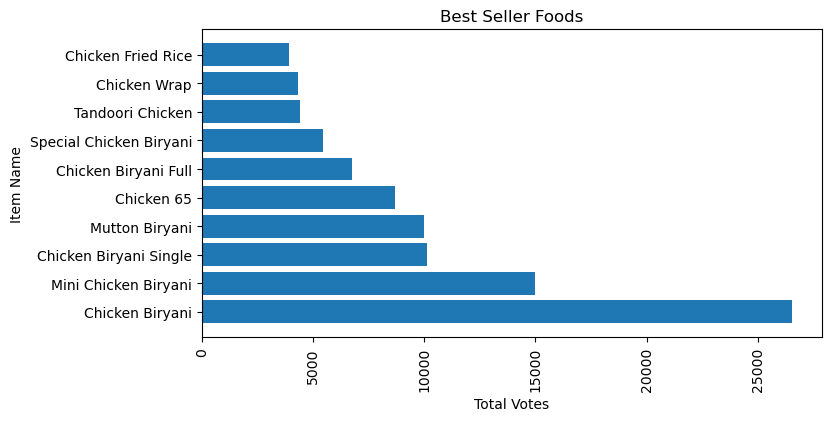

,City,Item Name,Votes
0,Hyderabad,Chicken Biryani,26545
1,Hyderabad,Mini Chicken Biryani,14998
2,Hyderabad,Chicken Biryani Single,10134
3,Hyderabad,Mutton Biryani,10010
4,Hyderabad,Chicken 65,8664
5,Hyderabad,Chicken Biryani Full,6753
6,Hyderabad,Special Chicken Biryani,5469
7,Hyderabad,Tandoori Chicken,4437
8,Hyderabad,Chicken Wrap,4314
9,Hyderabad,Chicken Fried Rice,3922


In [46]:
zomato_best = zomato[zomato['Best Seller'] == 1]

def bestseller(city):
    city1 = zomato_best['City'] == ' ' + city
   
    city_group = (zomato_best[city1].groupby(['City','Item Name'])['Votes']
                  .sum().nlargest(10)
                  .reset_index())
    city_group.sort_values(by='Votes', ascending=False, inplace=True)
        
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Item Name'], city_group['Votes'])
    plt.xlabel('Total Votes')
    plt.ylabel('Item Name')
    plt.title('Best Seller Foods')
    plt.xticks(rotation=90)
    
    #plt.savefig("1.jpg", dpi=300, bbox_inches='tight')
    plt.show()
          
    return city_group

city = input('Enter city name: ')
bestseller(city)

In [53]:
#Additional for Hyderabad

zomato_best_hyd = zomato_best[zomato_best['City'] == ' Hyderabad']

hyd_filtered = zomato_best_hyd[zomato_best_hyd['Item Name'].str.contains('Chicken Biryani', case=False)]
total_cb = hyd_filtered.shape[0]
votes_cb = hyd_filtered['Votes'].sum()

print(f"Total items contains `Chicken Biryani` in Item Name in Hyderabad is: {total_cb}")
print(f"With total `Votes`: {votes_cb}")

Total items contains `Chicken Biryani` in Item Name in Hyderabad is: 88
With total `Votes`: 81344


#### 2. What are top 10 best seller cuisine in every city?

Enter city name: Hyderabad


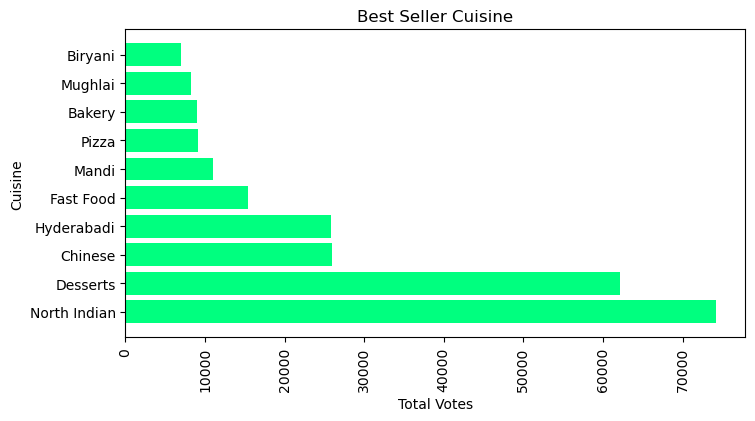

,City,Cuisine,Votes
0,Hyderabad,North Indian,74191
1,Hyderabad,Desserts,62154
2,Hyderabad,Chinese,25994
3,Hyderabad,Hyderabadi,25779
4,Hyderabad,Fast Food,15424
5,Hyderabad,Mandi,10976
6,Hyderabad,Pizza,9074
7,Hyderabad,Bakery,9034
8,Hyderabad,Mughlai,8222
9,Hyderabad,Biryani,6941


In [56]:
zomato_best = zomato[zomato['Best Seller'] == 1]

def bestseller(city):
    city1 = zomato_best['City'] == ' ' + city
   
    city_group = (zomato_best[city1].groupby(['City','Cuisine '])['Votes']
                  .sum().nlargest(10)
                  .reset_index())
    city_group.sort_values(by='Votes', ascending=False, inplace=True)
    #city_group = city_group.head(10)
    
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Cuisine '], city_group['Votes'], color='springgreen')
    plt.xlabel('Total Votes')
    plt.ylabel('Cuisine')
    plt.title('Best Seller Cuisine')
    plt.xticks(rotation=90)
    
    plt.savefig("2.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
bestseller(city)

#### 3. How much are lowest 10 best seller food price in every city?

Enter city name: Hyderabad


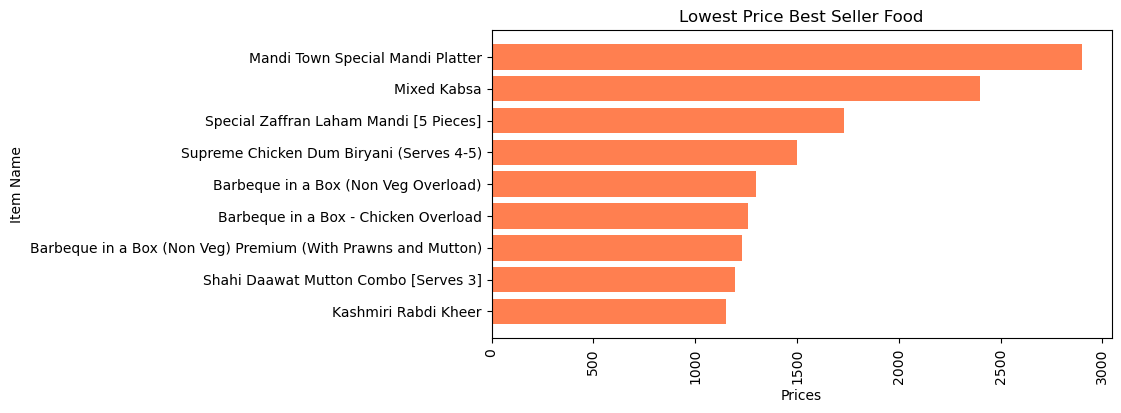

,City,Restaurant Name,Item Name,Prices
9,Hyderabad,Spice 9 Restaurant,Kashmiri Rabdi Kheer,1150.0
8,Hyderabad,Art Of Biryani,Shahi Daawat Mutton Combo [Serves 3],1198.0
6,Hyderabad,Barbeque Nation,Barbeque in a Box (Non Veg) Premium (With Praw...,1229.0
7,Hyderabad,UBQ by Barbeque Nation,Barbeque in a Box (Non Veg) Premium (With Praw...,1229.0
5,Hyderabad,Barbeque Nation,Barbeque in a Box - Chicken Overload,1259.0
4,Hyderabad,Barbeque Nation,Barbeque in a Box (Non Veg Overload),1299.0
3,Hyderabad,Paradise Biryani,Supreme Chicken Dum Biryani (Serves 4-5),1499.0
2,Hyderabad,Zaffran Mataam Alarabi,Special Zaffran Laham Mandi [5 Pieces],1730.0
1,Hyderabad,Mataam Al Yamani,Mixed Kabsa,2400.0
0,Hyderabad,Mandi Town,Mandi Town Special Mandi Platter,2900.0


In [57]:
zomato_best = zomato[zomato['Best Seller'] == 1]

def bestseller(city):
    city1 = zomato_best['City'] == ' ' + city
   
    city_group = (zomato_best[city1].groupby(['City','Restaurant Name','Item Name'])['Prices']
                  .mean().nlargest(10)
                  .reset_index())
    city_group.sort_values(by='Prices', ascending=True, inplace=True)
        
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Item Name'], city_group['Prices'], color='coral')
    plt.xlabel('Prices')
    plt.ylabel('Item Name')
    plt.title('Lowest Price Best Seller Food')
    plt.xticks(rotation=90)
    
    plt.savefig("3.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
bestseller(city)

#### 4. How much are average food prices in every city?

In [57]:
zomato_c = zomato.copy()

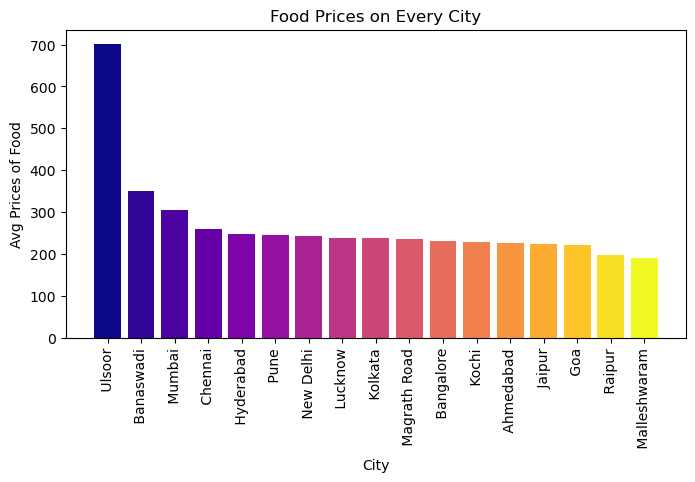

,City,max,min,median,mean
0,Ulsoor,1999.00,139.00,529.0,700.389831
1,Banaswadi,1250.00,47.65,330.0,349.466471
2,Mumbai,3800.00,0.95,280.0,306.135515
3,Chennai,6500.00,0.95,225.0,259.927833
4,Hyderabad,3250.00,0.95,210.0,248.443447
5,Pune,2560.00,0.95,219.0,245.684117
6,New Delhi,2069.00,2.00,200.0,242.382990
7,Lucknow,5593.22,1.00,199.0,237.712971
8,Kolkata,12024.00,0.95,200.0,237.164973
9,Magrath Road,864.79,75.42,259.0,234.553250


In [52]:
food_price = (zomato_c.groupby('City')['Prices']
            .agg(['max','min','median','mean'])
            .sort_values('mean',ascending=False)
            .reset_index())

plt.figure(figsize=(8, 4))

cmap = plt.get_cmap('plasma')
col2=cmap(np.linspace(0, 1, len(food_price)))

plt.bar(food_price['City'], food_price['mean'], color=col2)
plt.xlabel('City')
plt.ylabel('Avg Prices of Food')
plt.title('Food Prices on Every City')
plt.xticks(rotation=90)

#plt.savefig("4.jpg", dpi=300, bbox_inches='tight')
plt.show()

food_price

-.Ulsoor has the highest average meal price, while Malleshwaram has the lowest <br>
-.Most of the cities listed above has average meal price around 200-300 Rupees

Check the highest price food of all

In [73]:
zomato_kol = zomato[zomato['City'] == ' Kolkata']
kolkata_prc = (zomato_kol.groupby(['City','Restaurant Name','Item Name'])['Prices']
                  .mean().nlargest(10)
                  .reset_index())
kolkata_prc.sort_values(by='Prices', ascending=False, inplace=True)

kolkata_prc

,City,Restaurant Name,Item Name,Prices
0,Kolkata,Arsalan,Bakra Massallam [8 kg],12024.0
1,Kolkata,Behrouz Biryani,Grand Celebration:2 Biryanis (Non Veg)+4 porti...,3999.0
2,Kolkata,Behrouz Biryani,Grand Celebration:2 Biryanis(Veg+Non-Veg)+4 po...,3699.0
3,Kolkata,Arsalan,Mutton Rann Massallam,2724.0
4,Kolkata,Behrouz Biryani,Grand Celebration Combo with Dum Gosht Biryani...,2299.0
5,Kolkata,The Bahubelly,Bucket [Serves 8],1999.0
6,Kolkata,Behrouz Biryani,Grand Celebration: Lazeez Bhuna Murgh Biryani ...,1849.0
7,Kolkata,Behrouz Biryani,Do Gosht ki Dum Biryani (Mutton & Chicken Dum ...,1689.0
8,Kolkata,Behrouz Biryani,Dum Gosht (Mutton Dum Biryani - Boneless - Ser...,1679.0
9,Kolkata,Behrouz Biryani,Raan-E-Murgh Biryani (Chicken Whole Leg Biryan...,1619.0


#### 5. What restaurants are in top 10 delivery rating in every city?

Enter city name: Hyderabad


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18892\1256727708.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig("5.jpg", dpi=300, bbox_inches='tight')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18892\1256727708.py:19: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig("5.jpg", dpi=300, bbox_inches='tight')
C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


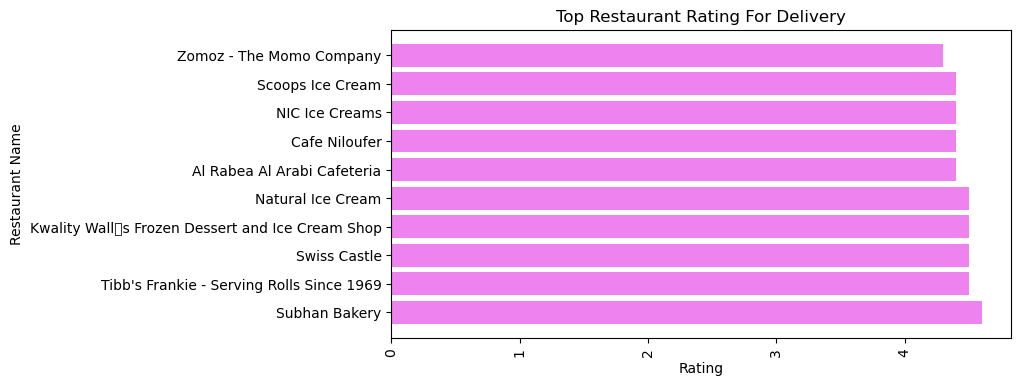

,City,Restaurant Name,Cuisine,top_delv
0,Hyderabad,Subhan Bakery,Bakery,4.6
1,Hyderabad,Tibb's Frankie - Serving Rolls Since 1969,Rolls,4.5
2,Hyderabad,Swiss Castle,Fast Food,4.5
3,Hyderabad,Kwality Walls Frozen Dessert and Ice Cream Shop,Desserts,4.5
4,Hyderabad,Natural Ice Cream,Ice Cream,4.5
5,Hyderabad,Al Rabea Al Arabi Cafeteria,Fast Food,4.4
6,Hyderabad,Cafe Niloufer,Street Food,4.4
7,Hyderabad,NIC Ice Creams,Desserts,4.4
8,Hyderabad,Scoops Ice Cream,Pizza,4.4
9,Hyderabad,Zomoz - The Momo Company,Fast Food,4.3


In [60]:
zomato_delv = zomato[zomato['Delivery Rating'] > 0]

def delv_rate(city):
    city1 = zomato_delv['City'] == ' ' + city
   
    city_group = (zomato_delv[city1].groupby(['City','Restaurant Name','Cuisine '])
                .agg(top_delv = ('Delivery Rating', 'max'))
                .sort_values('top_delv',ascending=False)
                .head(10)
                .reset_index())
    
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Restaurant Name'], city_group['top_delv'], color='violet')
    plt.ylabel('Restaurant Name')
    plt.xlabel('Rating')
    plt.title('Top Restaurant Rating For Delivery')
    plt.xticks(rotation=90)
    
    plt.savefig("5.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
delv_rate(city)

#### 6. What restaurants are in top 10 dine-in rating in every city? 

Enter city name: Hyderabad


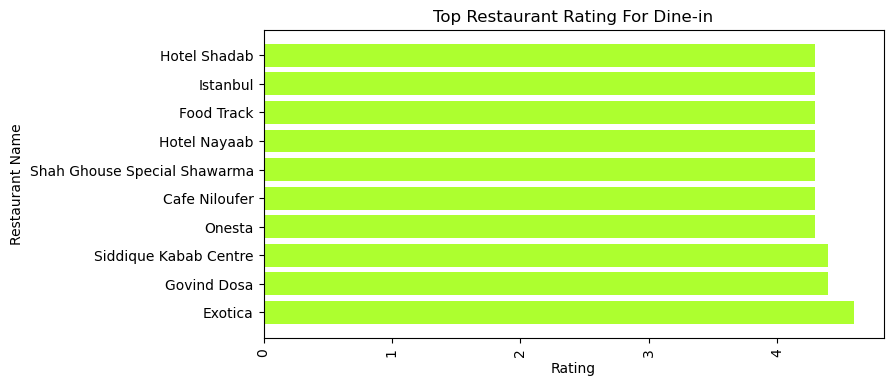

,City,Place Name,Restaurant Name,Cuisine,top_dine
0,Hyderabad,12th Square Building,Exotica,Seafood,4.6
1,Hyderabad,Charminar,Govind Dosa,South Indian,4.4
2,Hyderabad,Tolichowki,Siddique Kabab Centre,Chinese,4.4
3,Hyderabad,Banjara Hills,Onesta,Pizza,4.3
4,Hyderabad,Himayath Nagar,Cafe Niloufer,Street Food,4.3
5,Hyderabad,Charminar,Shah Ghouse Special Shawarma,Shawarma,4.3
6,Hyderabad,Charminar,Hotel Nayaab,Hyderabadi,4.3
7,Hyderabad,Charminar,Food Track,Street Food,4.3
8,Hyderabad,Malakpet,Istanbul,Wraps,4.3
9,Hyderabad,Ghansi Bazaar,Hotel Shadab,Mughlai,4.3


In [54]:
zomato_dine = zomato[zomato['Dining Rating'] > 0]

def dine_rate(city):
    city1 = zomato_dine['City'] == ' ' + city
   
    city_group = (zomato_dine[city1].groupby(['City', 'Place Name', 'Restaurant Name','Cuisine '])
                .agg(top_dine = ('Dining Rating', 'max'))
                .sort_values('top_dine',ascending=False)
                .head(10)
                .reset_index())
    
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Restaurant Name'], city_group['top_dine'], color='greenyellow')
    plt.ylabel('Restaurant Name')
    plt.xlabel('Rating')
    plt.title('Top Restaurant Rating For Dine-in')
    plt.xticks(rotation=90)
    
    #plt.savefig("6.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
dine_rate(city)

#### 7. What are the top 10 busiest restaurants in every city, defined by addition `Dining Votes` and `Delivery Votes`?

In [58]:
zomato_c['total_dinedev'] = zomato_c['Dining Votes'] + zomato_c['Delivery Votes']

Enter city name: Hyderabad


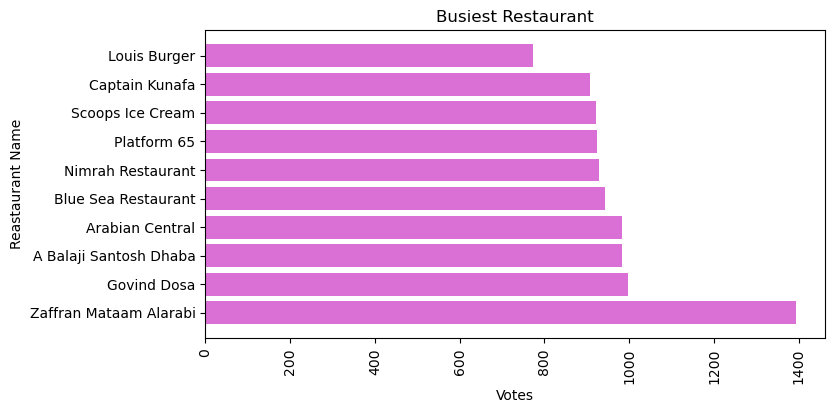

,Restaurant Name,Place Name,Cuisine,Dining Votes,Delivery Votes,top_resto
0,Zaffran Mataam Alarabi,Falaknuma,Desserts,482,911,1393
1,Govind Dosa,Charminar,South Indian,997,0,997
2,A Balaji Santosh Dhaba,Langer Houz,Chinese,9,974,983
3,Arabian Central,Chandrayanagutta,Fast Food,8,975,983
4,Blue Sea Restaurant,Basheer Bagh,North Indian,2,940,942
5,Nimrah Restaurant,Nampally,Desserts,72,857,929
6,Platform 65,Dilsukhnagar,North Indian,924,0,924
7,Scoops Ice Cream,Charminar,Pizza,6,915,921
8,Captain Kunafa,Malakpet,Turkish,208,699,907
9,Louis Burger,Banjara Hills,Fast Food,0,774,774


In [59]:

def resto_busiest(city):
    city1 = zomato_c['City'] == ' ' + city

    city_group = (zomato_c[city1].groupby(['Restaurant Name','Place Name','Cuisine ','Dining Votes','Delivery Votes'])
                .agg(top_resto = ('total_dinedev', 'max'))
                .sort_values('top_resto',ascending=False)
                .head(10)
                .reset_index())
    
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Restaurant Name'], city_group['top_resto'], color='orchid')
    plt.ylabel('Reastaurant Name')
    plt.xlabel('Votes')
    plt.title('Busiest Restaurant')
    plt.xticks(rotation=90)
    
    #plt.savefig("7.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
resto_busiest(city)

#### 8. What are top 5 busiest area for delivery in every city?

Enter city name: Hyderabad
Area of service: ['Malakpet' 'The Next Galleria Mall' 'Himayath Nagar' 'Nallakunta'
 'Tolichowki' 'Charminar' 'Taj Mahal Hotel' 'Kothapet' 'Abids'
 'Mehdipatnam' 'Yousufguda' 'Dilsukhnagar' 'Koti' 'Falaknuma'
 'Begum Bazaar' 'Chandrayanagutta' 'MPM Mall' 'RTC X roads' 'Saroor Nagar'
 'Ghansi Bazaar' 'Lakdikapul' 'Banjara Hills' 'Basheer Bagh' 'Kacheguda'
 'Charminar Area' 'Attapur' 'Nampally' 'Khairatabad' 'Musheerabad'
 'Boiguda' 'Narayanguda' 'Meerpet' 'Langer Houz' 'Masab Tank' 'Amberpet'
 'Somajiguda' '12th Square Building'], Total count: 37


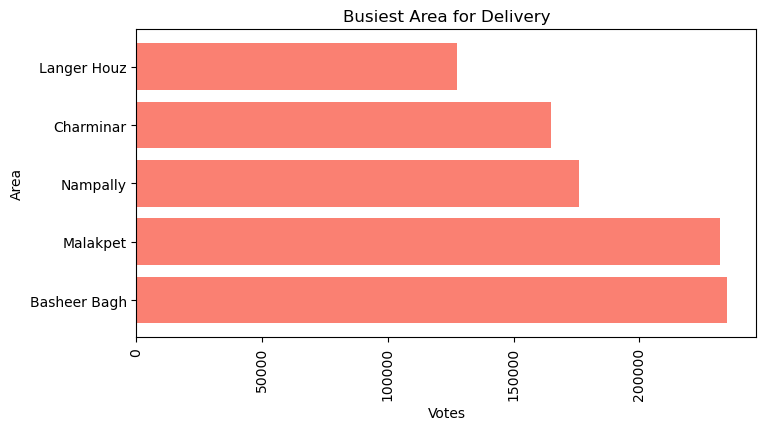

,City,Place Name,top_area
0,Hyderabad,Basheer Bagh,234824
1,Hyderabad,Malakpet,232096
2,Hyderabad,Nampally,176049
3,Hyderabad,Charminar,164953
4,Hyderabad,Langer Houz,127594


In [64]:
zomato_delv = zomato[zomato['Delivery Rating'] > 0]

def place_delv(city):
    city1 = zomato_delv['City'] == ' ' + city
   
    city_group = (zomato_delv[city1].groupby(['City','Place Name'])
                .agg(top_area = ('Delivery Votes', 'sum'))
                .sort_values('top_area',ascending=False)
                .head(5)
                .reset_index())
    
    place = zomato_delv[city1]['Place Name'].unique()
    place_cnt = zomato_delv[city1]['Place Name'].nunique()
    print(f'Area of service: {place}, Total count: {place_cnt}')
    
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Place Name'], city_group['top_area'], color='salmon')
    plt.ylabel('Area')
    plt.xlabel('Votes')
    plt.title('Busiest Area for Delivery')
    plt.xticks(rotation=90)
    
    plt.savefig("8.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
place_delv(city)

#### 9. What are top 5 busiest area for dine-in in every city?

Enter city name: Hyderabad
Area of service: ['Malakpet' 'The Next Galleria Mall' 'Himayath Nagar' 'Nallakunta'
 'Tolichowki' 'Charminar' 'Kothapet' 'Mehdipatnam' 'Yousufguda'
 'Dilsukhnagar' 'Begum Bazaar' 'Chandrayanagutta' 'MPM Mall' 'Abids'
 'Lakdikapul' 'Saroor Nagar' 'Basheer Bagh' 'Charminar Area' 'Attapur'
 'Nampally' 'Khairatabad' 'Ghansi Bazaar' 'Falaknuma' 'Boiguda'
 'Narayanguda' 'Meerpet' 'Langer Houz' 'Amberpet' 'Somajiguda' 'Kacheguda'], Total count: 30


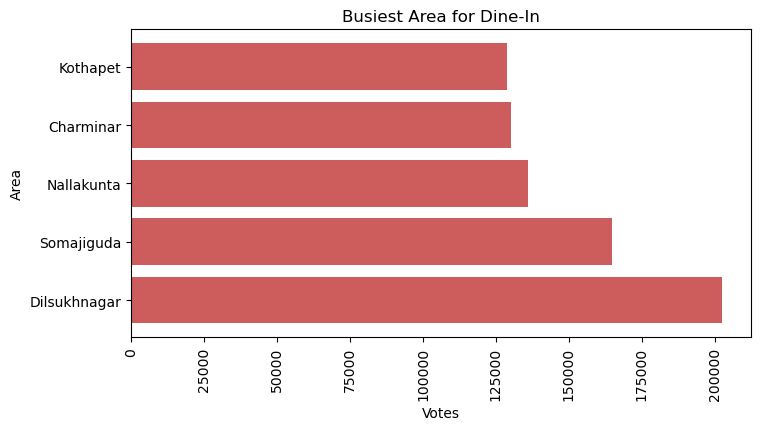

,Place Name,top_dinein
0,Dilsukhnagar,202356
1,Somajiguda,164696
2,Nallakunta,135915
3,Charminar,130036
4,Kothapet,128727


In [67]:
zomato_dinein = zomato[zomato['Dining Votes'] > 0]

def dine_in(city):
    city1 = zomato_dinein['City'] == ' ' + city
      
    city_group = (zomato_dinein[city1].groupby(['Place Name'])
                .agg(top_dinein = ('Dining Votes', 'sum'))
                .sort_values('top_dinein',ascending=False)
                .head(5)
                .reset_index())
    
    place = zomato_dinein[city1]['Place Name'].unique()
    place_cnt = zomato_dinein[city1]['Place Name'].nunique()
    print(f'Area of service: {place}, Total count: {place_cnt}')
    
    plt.figure(figsize=(8, 4))
    plt.barh(city_group['Place Name'], city_group['top_dinein'], color='indianred')
    plt.ylabel('Area')
    plt.xlabel('Votes')
    plt.title('Busiest Area for Dine-In')
    plt.xticks(rotation=90)
    
    plt.savefig("9.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return city_group

city = input('Enter city name: ')
dine_in(city)

#### 10. What are top 10 area with lowest  average food prices in every city?

Enter city name: Hyderabad
Area of service: ['Malakpet' 'The Next Galleria Mall' 'Himayath Nagar' 'Nallakunta'
 'Tolichowki' 'Charminar' 'Taj Mahal Hotel' 'Kothapet' 'Abids'
 'Mehdipatnam' 'Yousufguda' 'Dilsukhnagar' 'Koti' 'Falaknuma'
 'Begum Bazaar' 'Chandrayanagutta' 'MPM Mall' 'RTC X roads' 'Saroor Nagar'
 'Ghansi Bazaar' 'Lakdikapul' 'Banjara Hills' 'Basheer Bagh' 'Kacheguda'
 'Charminar Area' 'Attapur' 'Nampally' 'Khairatabad' 'Musheerabad'
 'Boiguda' 'Narayanguda' 'Masab Tank' 'Meerpet' 'Langer Houz' 'Amberpet'
 'Somajiguda' '12th Square Building'], Total count: 37


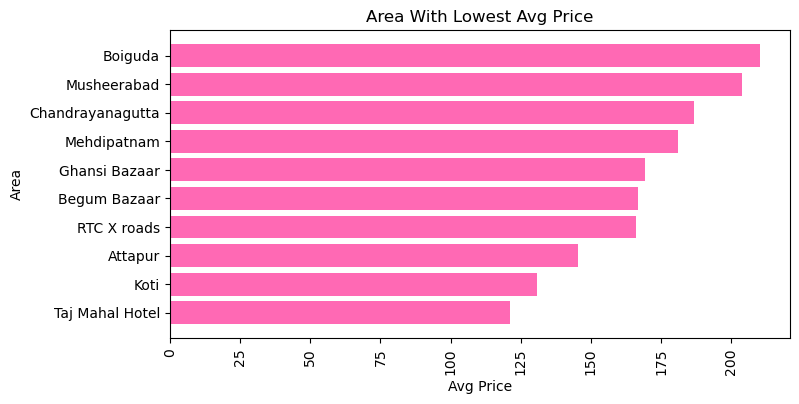

,City,Place Name,max,min,median,mean
0,Hyderabad,Taj Mahal Hotel,205.0,15.0,125.000,121.253165
1,Hyderabad,Koti,289.0,49.0,119.000,130.891892
2,Hyderabad,Attapur,660.0,20.0,123.095,145.373964
3,Hyderabad,RTC X roads,899.0,15.0,140.000,166.108108
4,Hyderabad,Begum Bazaar,1199.0,8.0,159.000,166.938034
5,Hyderabad,Ghansi Bazaar,455.0,17.0,140.000,169.434211
6,Hyderabad,Mehdipatnam,619.0,20.0,170.000,181.013216
7,Hyderabad,Chandrayanagutta,780.0,8.0,189.000,186.850932
8,Hyderabad,Musheerabad,810.0,22.0,185.000,203.765306
9,Hyderabad,Boiguda,309.0,65.0,239.000,210.399024


In [68]:
def area_food_price(city):
    city1 = zomato_c['City'] == ' ' + city
   
    area_price = (zomato_c[city1].groupby(['City','Place Name'])['Prices']
            .agg(['max','min','median','mean'])
            #.agg(avg_price = ('Prices','mean'))
            .sort_values('mean',ascending=True)
            .head(10)
            .reset_index())
    
    place = zomato_c[city1]['Place Name'].unique()
    place_cnt = zomato_c[city1]['Place Name'].nunique()
    print(f'Area of service: {place}, Total count: {place_cnt}')
        
    plt.figure(figsize=(8, 4))
    plt.barh(area_price['Place Name'], area_price['mean'], color='hotpink')
    plt.ylabel('Area')
    plt.xlabel('Avg Price')
    plt.title('Area With Lowest Avg Price')
    plt.xticks(rotation=90)
    
    plt.savefig("10.jpg", dpi=300, bbox_inches='tight')
    plt.show()
    
    return area_price

city = input('Enter city name: ')
area_food_price(city)